In [2]:
import numpy as np
import matplotlib.pyplot as plt

## What will we learn? 

* What is filtering?
* Spatial Correlation and Convolution
* Filtering in 1D signals
* Denoising Images and Smoothing (Lowpass)
* Mean, Median and Gaussian Filters 

** Filtering **

The name "fitler" is borrowed from frequency domain processing where "filtering" refers to passing, modifying, or rejecting specified frequency components of an image.

                                                            g(x) = T[f(x)]

** Spatial Correlation **

In [102]:
def correlation(f, kernel):

    c = np.zeros_like(f)
    for i in range(c.shape[0]):

        a = -kernel.shape[0]//2
        gx = 0
        for j in range(kernel.shape[0]):
            if i+a < 0 or i+a >= f.shape[0]:
                fs = 0
            else:
                fs = f[i+a]
            ws = kernel[j]
            gx += (fs*ws)
            a+=1
        c[i] = gx
    return c

In [106]:
correlation(np.array([0,0,0,0,0,0,1,0,0,0,0,0,0]), np.array([1,2,3]))

array([0, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0])

** Spatial Convolution **

In [107]:
def convolution(f, kernel):

    c = np.zeros_like(f)
    kernel = kernel[::-1]
    for i in range(c.shape[0]):

        a = -kernel.shape[0]//2
        gx = 0
        for j in range(kernel.shape[0]):
            if i+a < 0 or i+a >= f.shape[0]:
                fs = 0
            else:
                fs = f[i+a]
            ws = kernel[j]
            gx += (fs*ws)
            a+=1
        c[i] = gx
    return c

In [117]:
convolution(np.array([0,0,0,0,0,0,1,0,0,0,0,0,0]), np.array([1,2,3]))

array([0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0])

An example of an incoming realtime noisy signal --  

How do we denoise a signal?

** Denoising of 1D signal using Mean Filter**

In [66]:
x = np.linspace(1,20, 100)
y = np.sin(x)

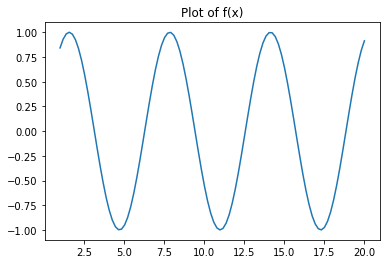

In [76]:
plt.plot(x, y)
plt.title("Plot of f(x)")
plt.show()

Now we want to add some noise to replicate a noisy sine signal f<sup>'</sup>(x). We assume that the noise is normally distributed.

In [79]:
noise = np.random.randn(100)
noisy_signal = y + 0.1*noise

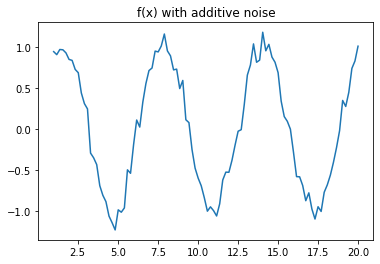

In [80]:
plt.plot(x, noisy_signal)
plt.title("f(x) with additive noise")
plt.show()

We convolve the signal f(x) with a mean filter

In [113]:
convolved_signal = np.convolve(noisy_signal, np.ones(5)/5)

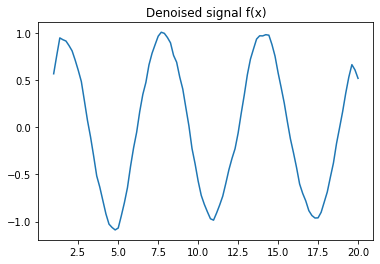

In [114]:
plt.plot(x, convolved_signal[2:-2])
plt.title("Denoised signal f(x)")
plt.show()

** Denoising in images with Mean filter **

In [118]:
import cv2

In [120]:
img = cv2.cvtColor(cv2.imread("./test_image.png"), cv2.COLOR_BGR2RGB)

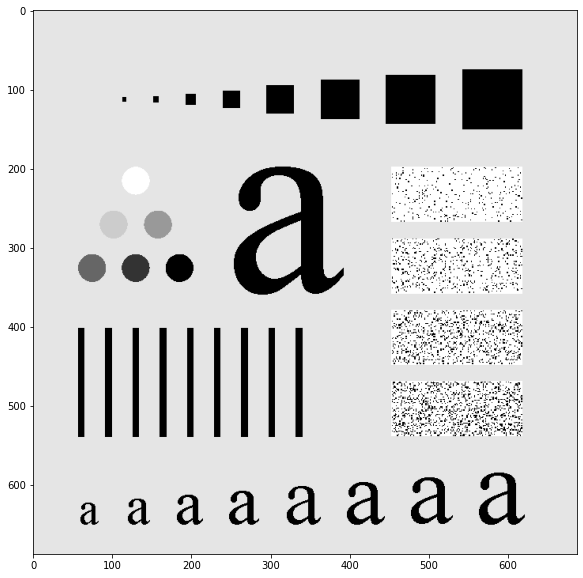

In [122]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

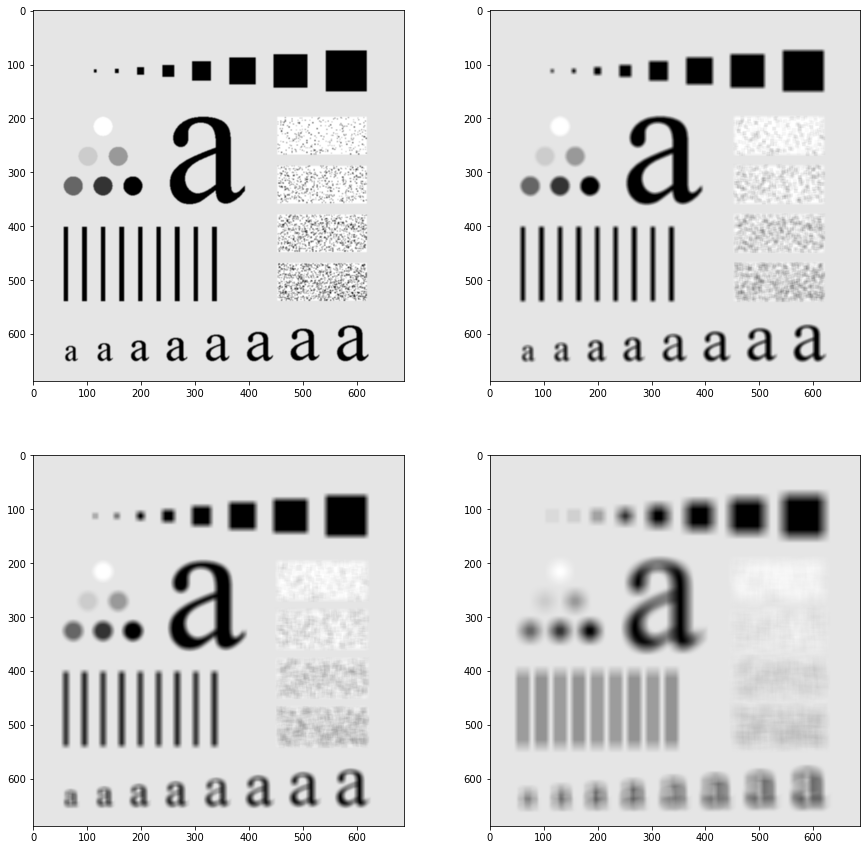

In [139]:
plt.figure(figsize=(15,15))
for s, i in enumerate([3, 7, 11, 25]):
    mean_filtered = cv2.filter2D(img, -1, np.ones((i,i))/i**2)
    plt.subplot(2,2,s+1)
    plt.imshow(mean_filtered)
plt.show()

** Gaussian Filtering **

A 2D multivariate gaussian distribution: 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Gaussian_2d.png/786px-Gaussian_2d.png" width="400" height="300" />

** Gaussian kernels **

<img src="eq.png" width="400" height="100" />

How does this turn into a filtering kernal?

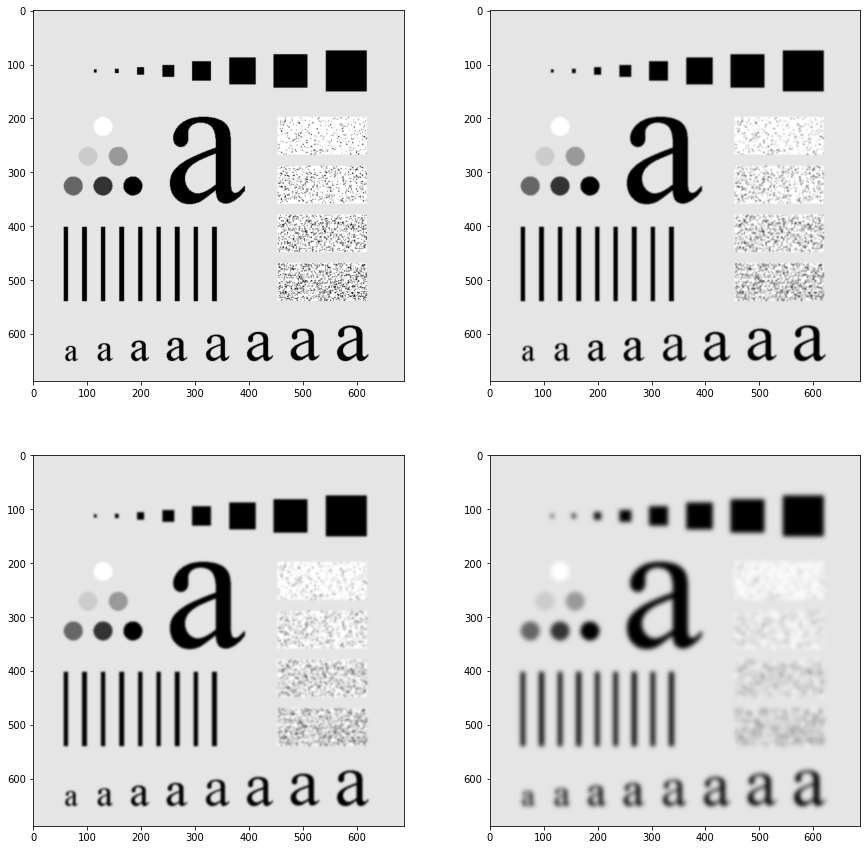

In [158]:
plt.figure(figsize=(15,15))
for s, i in enumerate([3, 7, 11, 25]):
    gauss_filtered = cv2.GaussianBlur(img,(i,i),i/6)
    plt.subplot(2,2,s+1)
    plt.imshow(gauss_filtered)
plt.show()

** Median Filtering **

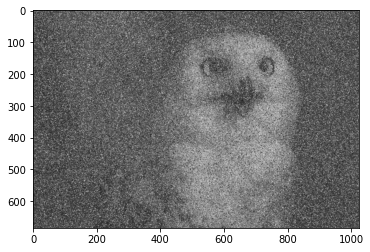

In [160]:
noisy_image = cv2.cvtColor(cv2.imread("./sandp.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(noisy_image)
plt.show()

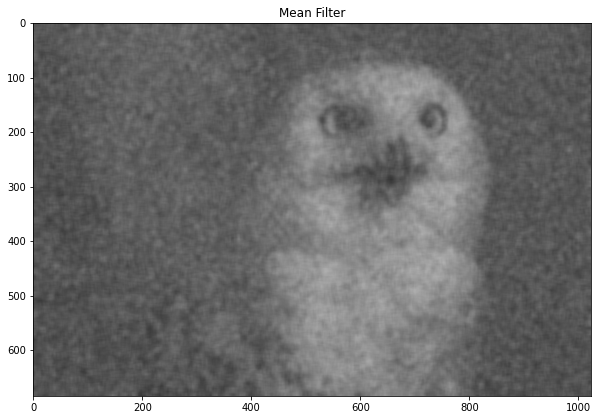

In [172]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.blur(noisy_image, (11,11)))
plt.title("Mean Filter")
plt.show()

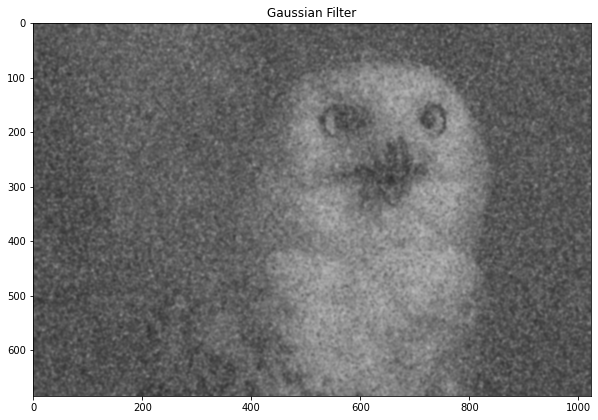

In [171]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.GaussianBlur(noisy_image, (11,11), 11/6))
plt.title("Gaussian Filter")
plt.show()

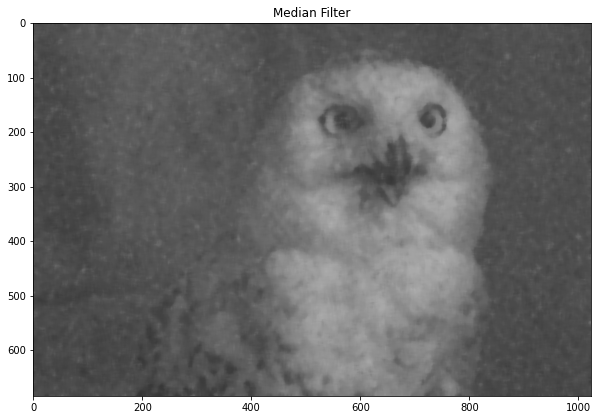

In [170]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.medianBlur(noisy_image, 11))
plt.title("Median Filter")
plt.show()

There are a lot of other filters, Bilateral filtering, Min filtering, Max filtering..... etc.

Next Session?

We learn about High pass filtering or Sharpening an Image and Image Gradients!!